# Eigen Faces Vs the Fisher Faces

#### Author: Tamal Majumder
* Github: https://github.com/t-majumder
* LinkedIn: https://www.linkedin.com/in/tamal-majumder/
* Dataset: olivetti_faces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

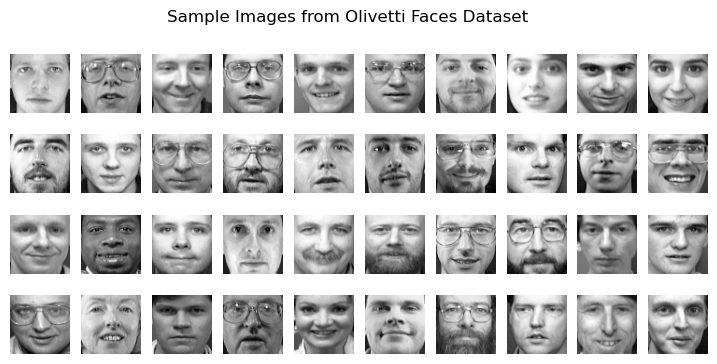

In [35]:
# Loading the dataset
data=fetch_olivetti_faces()
images=data.images
n_samples,h,w=images.shape

#Flattening the image for PCA
X=images.reshape(n_samples,h*w)
y=data.target


# Defining indices for the images to be displayed
a = np.arange(0, 400, 10)  

# Creating a figure and a set of subplots
fig, ax = plt.subplots(4, 10, figsize=(9, 4))

# Looping over the subplots and images
for i in range(40):
    ax[i // 10, i % 10].imshow(images[a[i]], cmap='gray')
    ax[i // 10, i % 10].axis('off')

plt.suptitle('Sample Images from Olivetti Faces Dataset')
plt.show()

In [3]:
X.shape

(400, 4096)

# Computing the mean face

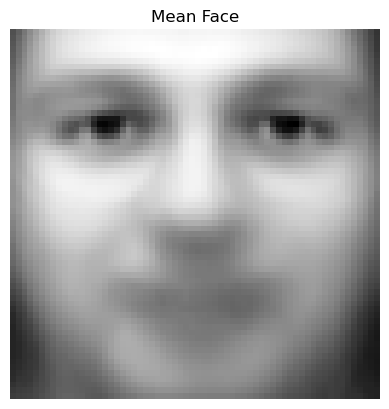

In [4]:
mean_face=np.mean(X,axis=0)
# Displaing the mean face
plt.imshow(mean_face.reshape(h, w), cmap='gray')
plt.title('Mean Face')
plt.axis('off')
plt.show()

# Computing the Eigenfaces

### Mean Shifted Faces

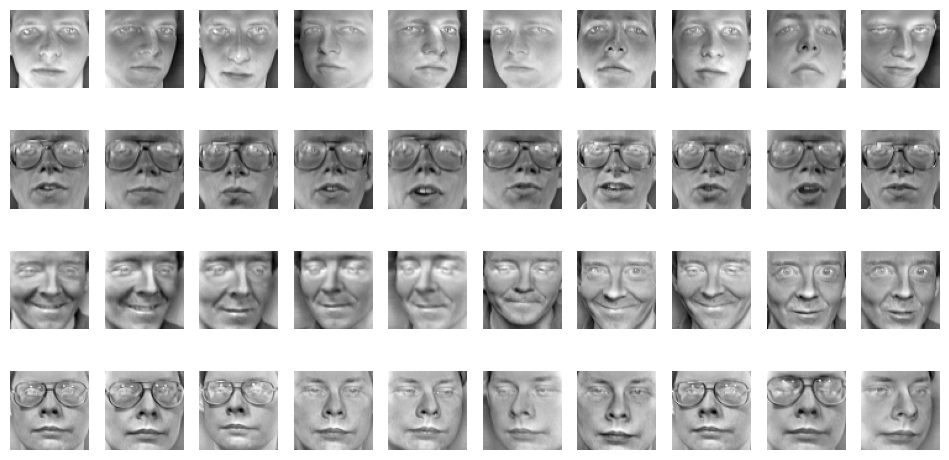

In [5]:
# Normalized Faces
X_centered=X-mean_face

# Plotting Normalized Mean Shifted Faces
nm=np.arange(0,400,10)
fig, axes = plt.subplots(4, 10, figsize=(12, 6))
for i in range(40):
    ax = axes[i // 10, i % 10]  # Determining the subplot location
    ax.imshow(X_centered[i].reshape(h, w), cmap='gray')
    ax.axis('off')  # Hiding the axis for a cleaner look
plt.show()

### Covarience Matrix:

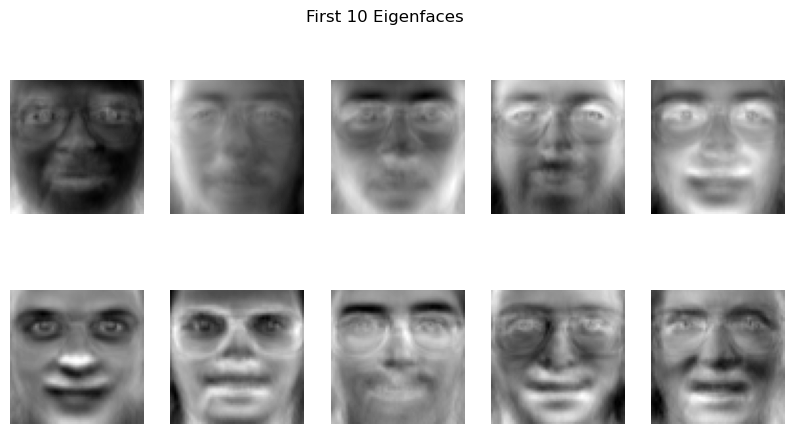

In [23]:
# Covarience Matrix:
cov_matrix = np.dot(X_centered, X_centered.T) / n_samples

# Computing the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sorting the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Projecting the eigenvectors back to the original space
eigenfaces = np.dot(X_centered.T, eigenvectors).T

# Normalized eigenfaces
eigenfaces = eigenfaces / np.linalg.norm(eigenfaces, axis=1).reshape(-1, 1)

# Selecting the top k eigenfaces
k = 10  # We can choose k based on how much variance you want to capture
eigenfaces_top_k = eigenfaces[:k]

# Displaying the first 10 eigenfaces
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax[i//5, i%5].imshow(eigenfaces_top_k[i].reshape(h, w), cmap='gray')
    ax[i//5, i%5].axis('off')
plt.suptitle('First 10 Eigenfaces')
plt.show()

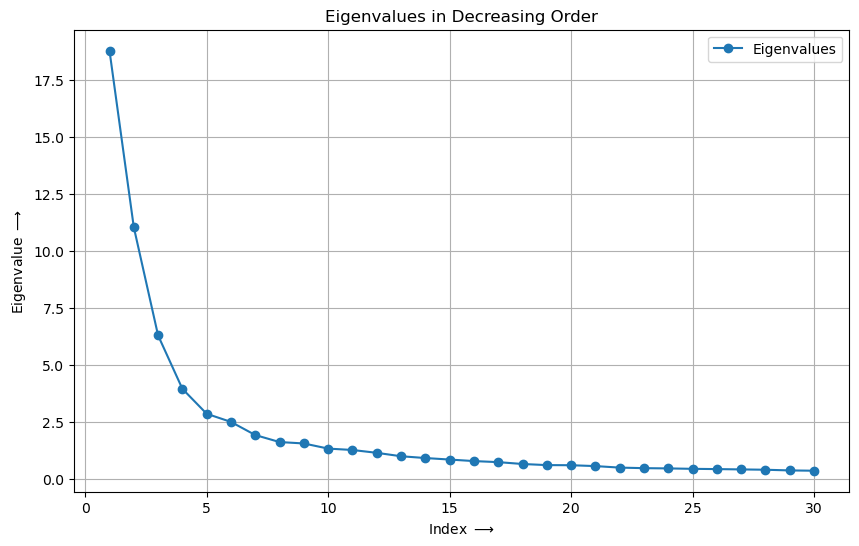

In [21]:
# Ploting the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 31), eigenvalues[0:30], marker='o',label='Eigenvalues')
plt.title('Eigenvalues in Decreasing Order')
plt.xlabel(r'Index $\longrightarrow$')
plt.ylabel(r'Eigenvalue $\longrightarrow$')
plt.grid(True)
plt.legend()
plt.show()

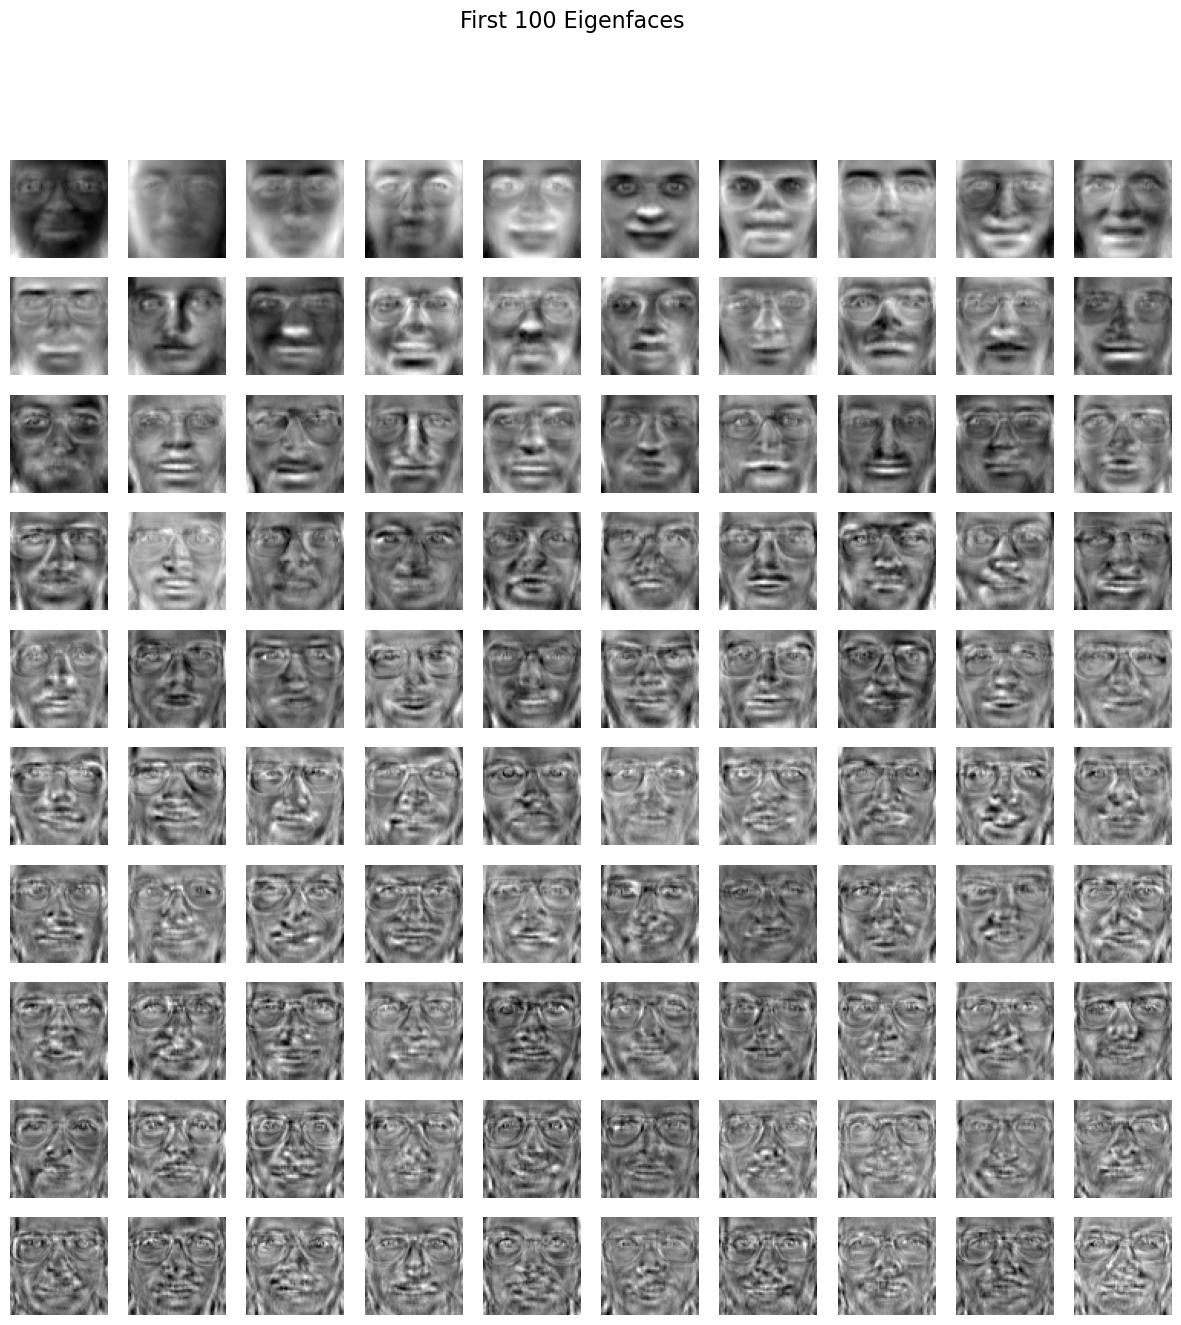

In [22]:
# Displaying the first 100 eigenfaces
fig, ax = plt.subplots(10, 10, figsize=(15, 15))  # 10x10 grid of images
for i in range(100):
    ax[i//10, i%10].imshow(eigenfaces_top_k[i].reshape(h, w), cmap='gray')
    ax[i//10, i%10].axis('off')  

plt.suptitle('First 100 Eigenfaces', fontsize=16)
plt.show()

* So as we go further down the eigenvector space we see that it captures less and less varience so they are of less and less significance thats why the tok k values do the job perfectly

In [24]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Shuffling the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Splitting the data (e.g., 70% training, 30% testing)
split_ratio = 0.7
split_index = int(split_ratio * X.shape[0])

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]


In [25]:
# Projecting training data
X_train_pca = np.dot(X_train - mean_face, eigenfaces_top_k.T)

# Projecting testing data
X_test_pca = np.dot(X_test - mean_face, eigenfaces_top_k.T)


In [26]:
#KNN Based distance measure
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def nearest_neighbor(X_train_pca, y_train, X_test_pca):
    y_pred = []
    for test_sample in X_test_pca:
        distances = np.array([euclidean_distance(test_sample, train_sample) for train_sample in X_train_pca])
        nearest_index = np.argmin(distances)
        y_pred.append(y_train[nearest_index])
    return np.array(y_pred)

# Predicting the labels of the test set
y_pred_pca = nearest_neighbor(X_train_pca, y_train, X_test_pca)

Accuracy with Eigenfaces (PCA): 85.00%


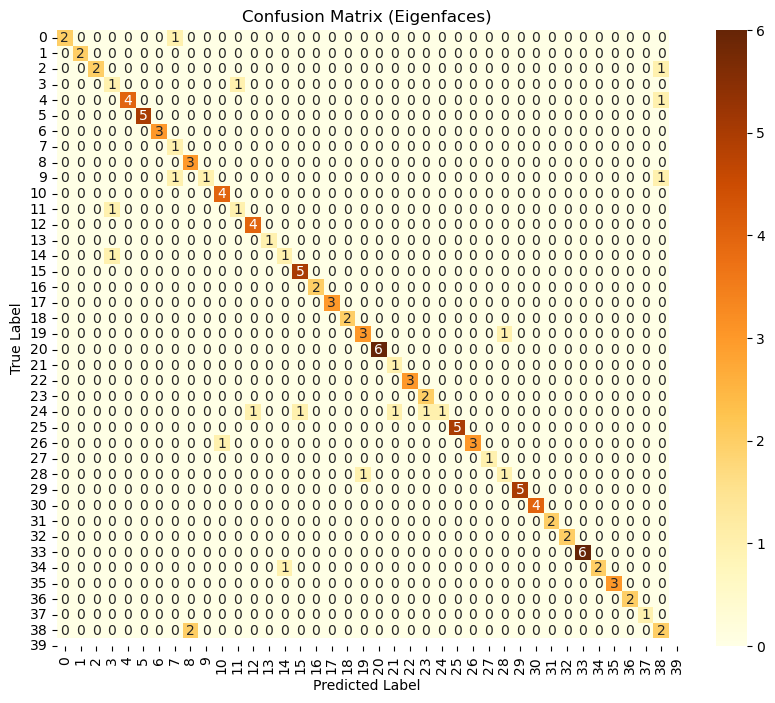

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculating accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy with Eigenfaces (PCA): {accuracy_pca * 100:.2f}%')

# Computing confusion matrix
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

# Plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='YlOrBr', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Eigenfaces)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

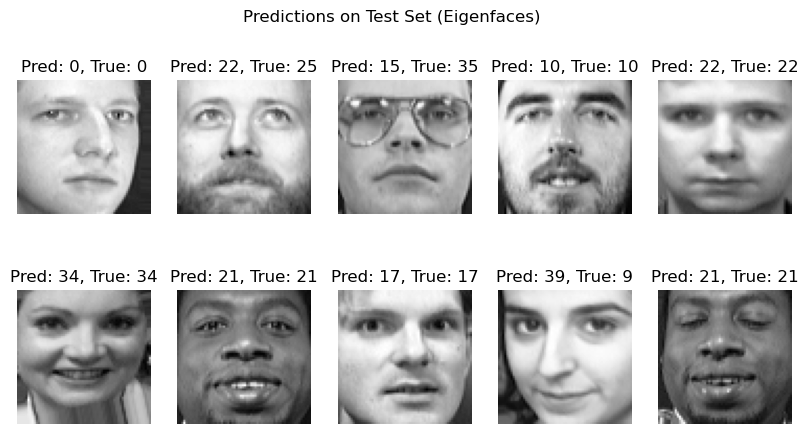

In [28]:
# Visualizing some correct and incorrect predictions
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax[i//5, i%5].imshow(X_test[i].reshape(h, w), cmap='gray')
    ax[i//5, i%5].set_title(f'Pred: {y_pred_pca[i]}, True: {y_test[i]}')
    ax[i//5, i%5].axis('off')
plt.suptitle('Predictions on Test Set (Eigenfaces)')
plt.show()

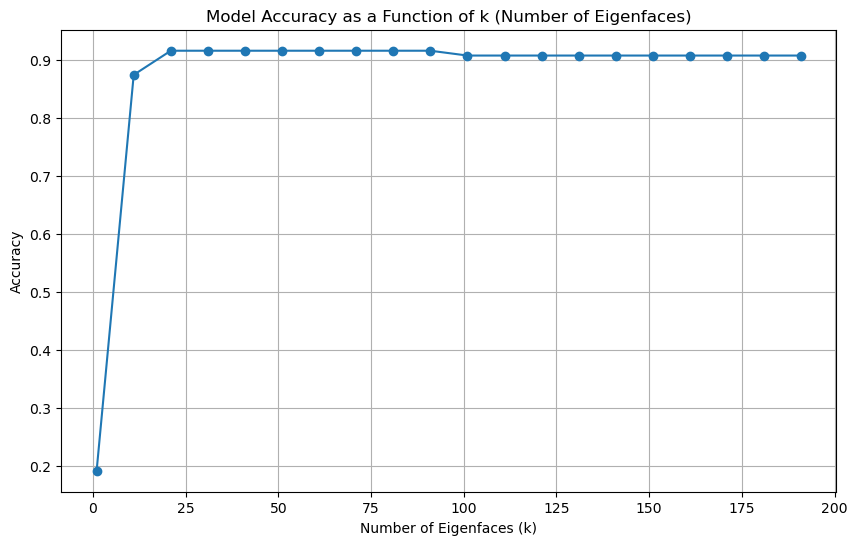

In [29]:
# Evaluating accuracy for different values of k
k_values = np.arange(1, 201, 10)  # You can adjust the range and step size
accuracies = []

for k in k_values:
    # Selecting the top k eigenfaces
    eigenfaces_top_k = eigenfaces[:k]

    # Projecting training and testing data onto the top k eigenfaces
    X_train_pca = np.dot(X_train - mean_face, eigenfaces_top_k.T)
    X_test_pca = np.dot(X_test - mean_face, eigenfaces_top_k.T)

    # Predicting the labels of the test set using the nearest neighbor classifier
    y_pred_pca = nearest_neighbor(X_train_pca, y_train, X_test_pca)

    # Calculating accuracy
    accuracy_pca = np.sum(y_pred_pca == y_test) / len(y_test)
    accuracies.append(accuracy_pca)

# Plotting the accuracies as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Model Accuracy as a Function of k (Number of Eigenfaces)')
plt.xlabel('Number of Eigenfaces (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred_pca, average='weighted')
recall = recall_score(y_test, y_pred_pca, average='weighted')
f1 = f1_score(y_test, y_pred_pca, average='weighted')

print(f'Precision with Eigenfaces (PCA): {precision:.2f}')
print(f'Recall with Eigenfaces (PCA): {recall:.2f}')
print(f'F1 Score with Eigenfaces (PCA): {f1:.2f}')

Precision with Eigenfaces (PCA): 0.94
Recall with Eigenfaces (PCA): 0.91
F1 Score with Eigenfaces (PCA): 0.91
